# Principal Component Analysis (PCA)

This notebook demonstrates how to apply Principal Component Analysis (PCA) to a real-world dataset.

## Import Required Libraries

Import the necessary libraries including numpy, pandas, seaborn, and matplotlib.

In [1]:
# Import the required libraries.
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

## Define Colors and Helper Functions

Define custom colors and helper functions for visualization.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#179E86", # Dark Green
    "#9EBE5B", # Light Green
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#633248", # Brown
    "#44546A", # Gray
]


def render_covariance_matrix(cov_matrix: pd.DataFrame):
    """
    Render the covariance matrix as a heatmap.

    Args:
        cov_matrix (pd.DataFrame): The covariance matrix to be rendered.
    """
    plt.figure(figsize=(8, 6))
    cmap = LinearSegmentedColormap.from_list(
        "custom_green", ["#FFFFFF", "#179E86"])
    sns.heatmap(
        cov_matrix, annot=True, fmt="f", cmap=cmap,
        xticklabels=["Systolic Pressure", "Diastolic Pressure"],
        yticklabels=["Systolic Pressure", "Diastolic Pressure"]
    )
    plt.title("Covariance Matrix")


def render_transformation_matrix(matrix: pd.DataFrame):
    """
    Render the transformation matrix as a heatmap.

    Args:
        matrix (pd.DataFrame): The transformation matrix to be rendered.
    """
    plt.figure(figsize=(8, 6))
    cmap = LinearSegmentedColormap.from_list(
        "custom_green", ["#FFFFFF", "#179E86"])
    sns.heatmap(
        matrix, annot=True, fmt="f", cmap=cmap,
        xticklabels=["First Eigenvector", "Second Eigenvector"],
        yticklabels=["X", "Y"]
    )
    plt.title("Transformation Matrix")


def plot_data(df: pd.DataFrame, x_label: str = "Systolic Pressure",
              y_label: str = "Diastolic Pressure"):
    """
    Create a scatter plot to show the relationship between Systolic Pressure and
    Diastolic Pressure, and modifying the circle size to show data overlapping.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be plotted.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
    """
    sns.scatterplot(
        data=df, x=x_label, y=y_label, color=colors[0],
        size=df.groupby(
            [x_label, y_label]
        ).transform("size"),
        sizes=(50, 200)
    )
    plt.title("Systolic and Diastolic Rate (Medical Data)")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    x_extra = (df[x_label].max() - df[x_label].min()) * 0.15
    y_extra = (df[y_label].max() - df[y_label].min()) * 0.15
    plt.xlim(
        df[x_label].min() - x_extra,
        df[x_label].max() + x_extra
    )
    plt.ylim(
        df[y_label].min() - y_extra,
        df[y_label].max() + y_extra
    )

    plt.grid(True)
    plt.tight_layout()


def plot_second_order(coefficients: list):
    """
    Plot the roots of a second-order equation.

    Args:
        coefficients (list): The coefficients of the second-order equation.
    """
    roots = np.roots(coefficients)
    print("Roots of the equation:", roots)

    # Plot the roots on a graph.
    x = np.linspace(-6.225, 50, 400)
    y = x**2 - 43.77*x + 439.94
    plt.plot(
        x, y, color=colors[0], label=r"$\lambda^2 - 43.77\lambda + 439.94 = 0$")

    # Plot the roots and the y-intercept.
    plt.scatter(roots, [0, 0], color=colors[4], zorder=5)
    plt.text(roots[0]-15, 0.5, f"x1 = {roots[1]:.2f}", ha="right")
    plt.text(roots[0]+2.5, 0.5, f"x2 = {roots[0]:.2f}", ha="left")

    plt.scatter([0], [coefficients[-1]], color=colors[4], zorder=5)
    plt.text(0.75, coefficients[-1], f"c = {coefficients[-1]:.2f}", ha="left")

    plt.title("Second Order Equation")
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$f(\lambda)$")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

## Load and Visualize Blood Pressure Data

Load the blood pressure dataset and visualize the relationship between systolic and diastolic pressure.

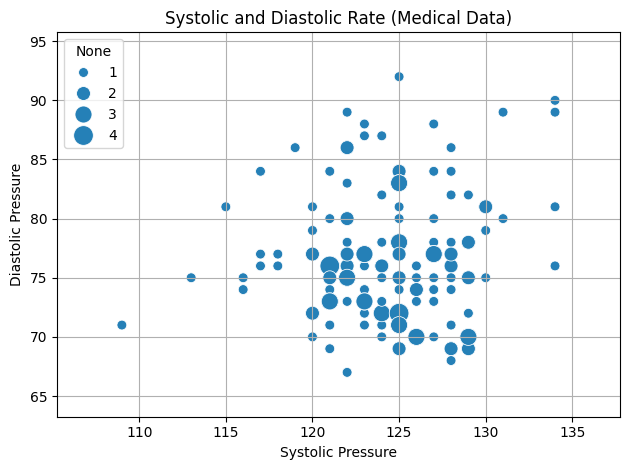

In [3]:
# Load the data.
df = pd.read_csv("./data/bdp.csv")
df = df[["Systolic Pressure", "Diastolic Pressure"]]
plot_data(df)
plt.show()

## Step 1: Center the Data

Center the data by subtracting the mean of each column.

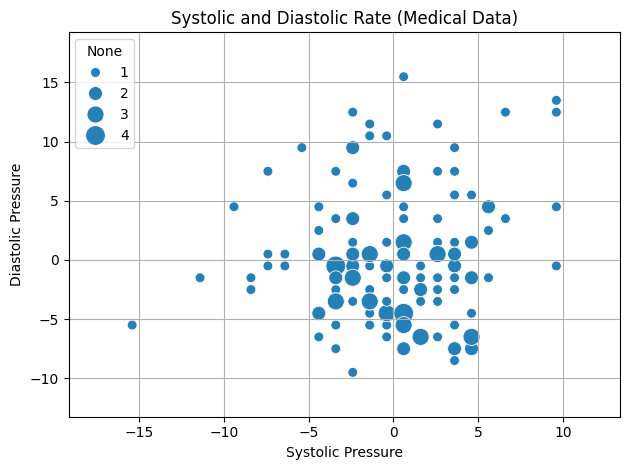

In [4]:
# Step 1: Center the data by subtracting the mean of each column.
df_centered = df - df.mean()
plot_data(df_centered)
plt.show()

## Step 2: Calculate the Covariance Matrix

Calculate the covariance matrix of the centered data.

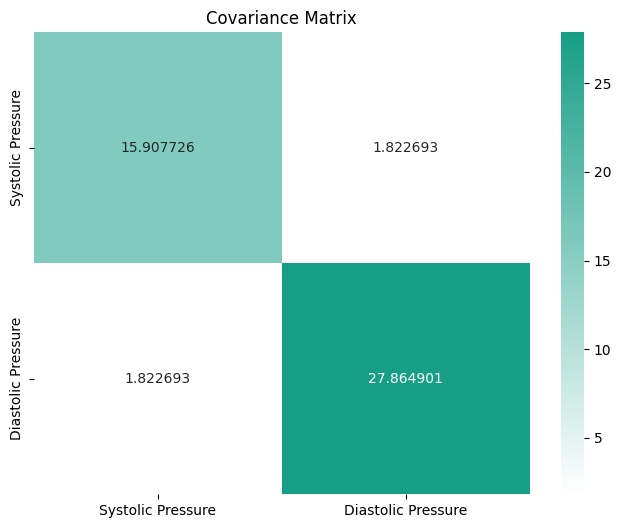

In [5]:
# Step 2: Calculate the covariance matrix.
cov_matrix = df_centered.cov()
render_covariance_matrix(cov_matrix)
plt.show()

## Step 3: Calculate Eigenvectors and Eigenvalues

Calculate the eigenvectors and eigenvalues using Singular Value Decomposition (SVD).

In [6]:
# Step 3: Calculate the eigenvectors and eigenvalues of the covariance matrix.
_, S, Vt = np.linalg.svd(df_centered, full_matrices=False)
eigenvectors = Vt.T
eigenvalues = S ** 2 / (len(df_centered) - 1)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [28.13657068 15.63605625]
Eigenvectors: [[ 0.14742017  0.98907396]
 [ 0.98907396 -0.14742017]]


## Visualize Second Order Equation

Plot the result of the equation λ² - 43.77λ + 439.94 = 0 showing the eigenvalues as roots.

Roots of the equation: [28.13105676 15.63894324]


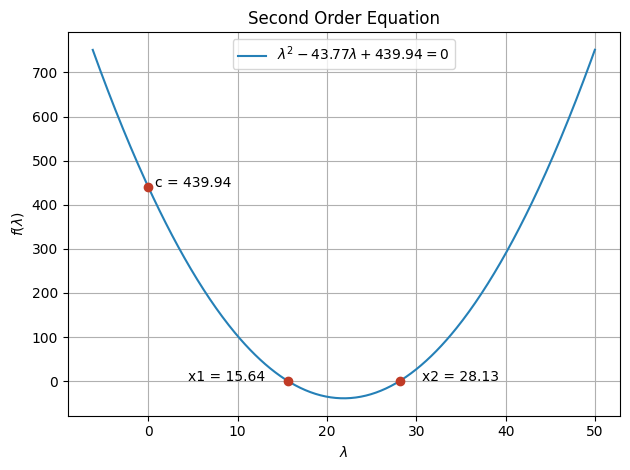

In [7]:
# Plot the result of the equation λ^2 - 43.77λ + 439.94 = 0
coefficients = [1, -43.77, 439.94]
plot_second_order(coefficients)
plt.show()

## Visualize Eigenvectors

Plot arrows to illustrate the eigenvectors on the centered data.

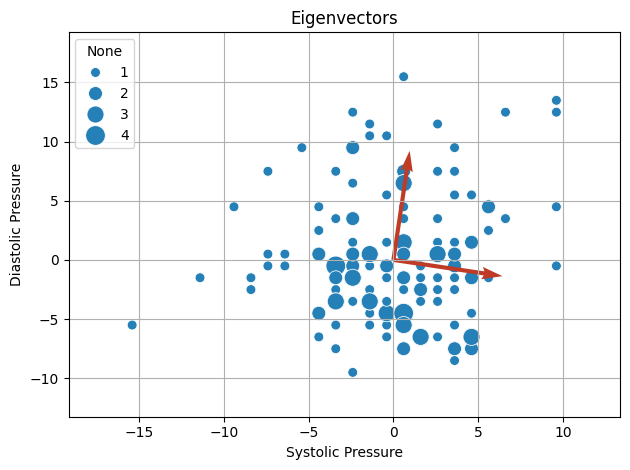

In [8]:
# Plot arrows to illustrate the eigenvectors.
plot_data(df_centered)
origin = np.array([[0, 0], [0, 0]])
plt.quiver(
    *origin, eigenvectors[0, :], eigenvectors[1, :], color=colors[4], scale=5)
plt.title("Eigenvectors")
plt.show()

## Step 4: Create Transformation Matrix

Sort and select the principal components to create the transformation matrix.

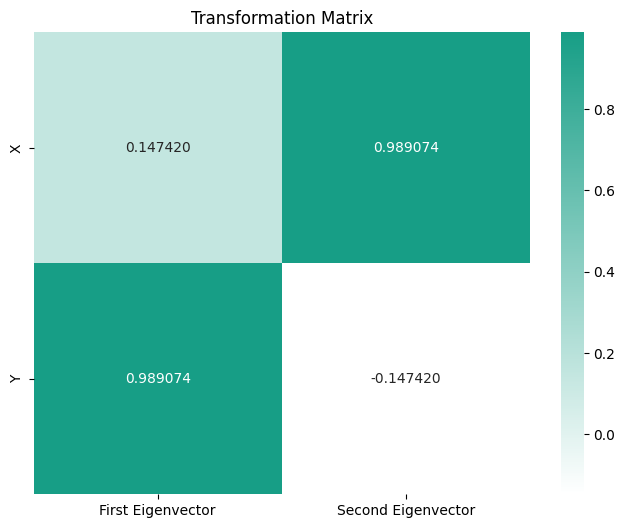

In [9]:
# Step 4: Sort and select the principal components.
transformation_matrix = eigenvectors[::1]
render_transformation_matrix(transformation_matrix)
plt.show()

## Step 5: Transform the Data

Transform the data using the transformation matrix to obtain principal components.

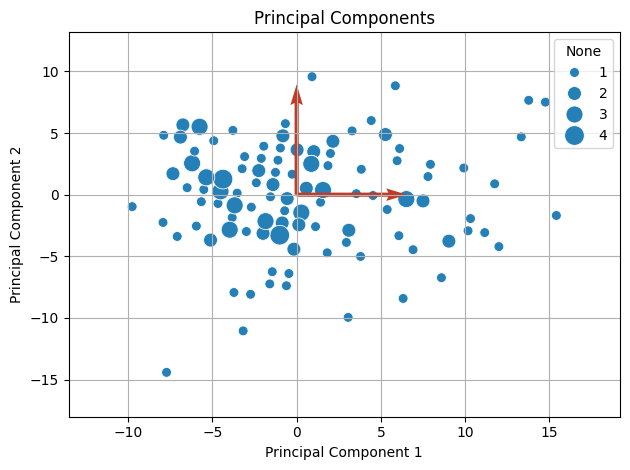

In [10]:
# Step 5: Transform the data using the transformation matrix.
df_transformed = df_centered.dot(transformation_matrix)
df_transformed.columns = ["Principal Component 1", "Principal Component 2"]
plot_data(df_transformed, "Principal Component 1", "Principal Component 2")

origin = np.array([[0, 0],[0, 0]])
eigenvectors_transformed = eigenvectors.T.dot(transformation_matrix)
plt.quiver(*origin,
           eigenvectors_transformed[0, :],
           eigenvectors_transformed[1, :],
           color=colors[4], scale=5)
plt.title("Principal Components")
plt.show()

## Step 6: Interpret the Results

Calculate the variance and covariance of the transformed data.

Variance of the transformed data: Principal Component 1    28.136571
Principal Component 2    15.636056
dtype: float64


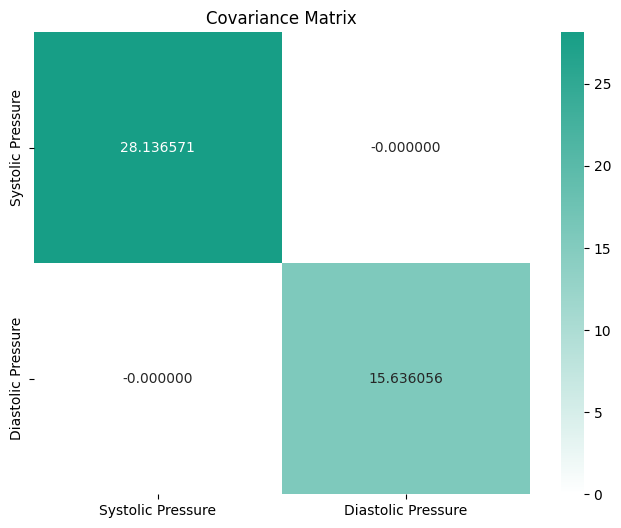

In [11]:
# Step 6: Interpret the results.

# Calculate the variance of the transformed data.
variance = df_transformed.var()
print("Variance of the transformed data:", variance)

cov_matrix = df_transformed.cov()
render_covariance_matrix(cov_matrix)
plt.show()

## Step 7: Reduce Dimensionality

Reduce the dimensionality of the data to 1D by projecting onto the first principal component.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_48709/2576675874.py:77: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(


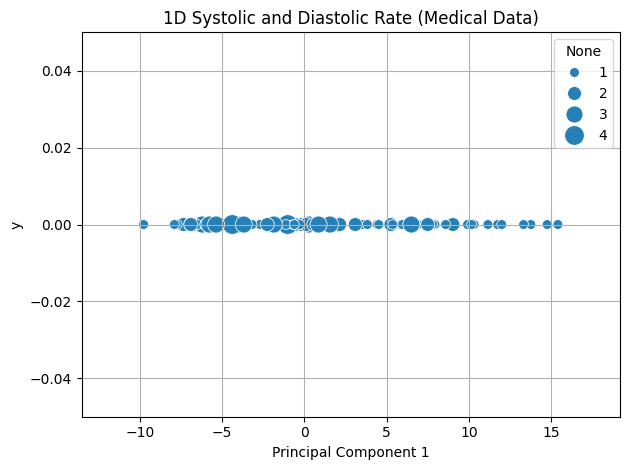

In [12]:
# Step 7: Reduce the dimensionality of the data.
df_reduced = df_transformed.copy()
df_reduced["y"] = 0
plot_data(df_reduced, "Principal Component 1", "y")
plt.title("1D Systolic and Diastolic Rate (Medical Data)")
plt.show()